<a href="https://colab.research.google.com/github/johnnysDeu/Thesis/blob/main/Model_Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.youtube.com/watch?v=jztwpsIzEGc

Building a CNN from scratch with any image dataset

!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [1]:
#!pip install "tensorflow<2.11"

In [2]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [3]:
#!pip install torchvision

In [4]:

#!pip list
import torch

In [5]:
#!nvidia-smi

In [6]:
#!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [7]:
# add headings with ##(space) on the markdowns

In [8]:
#!pip install tensorflor keras

In [9]:
import tensorflow as tf
import os

In [10]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [11]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [12]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [13]:
#! nvidia-smi

In [14]:
!pip install opencv-python

## Imports

In [15]:
import tensorflow as tf
import os
import cv2
import imghdr

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import numpy as np
from matplotlib import pyplot as plt

In [18]:
Current_dir = os.getcwd()
Current_dir

'/content'

In [19]:
path = '/content/drive/MyDrive/Colab Notebooks/Thesis/data'
os.chdir(path)

In [20]:
Current_dir = os.getcwd()
Current_dir

'/content/drive/MyDrive/Colab Notebooks/Thesis/data'

In [21]:
data_dir='data'
os.listdir(data_dir)

['Sample_images', 'Ads']

In [22]:
#os.listdir(os.path.join(data_dir,'Ads'))

In [23]:
imgTest= cv2.imread(os.path.join('data','Ads','converted_iframe_9_AD.jpg'))

In [24]:
type(imgTest)

NoneType

In [25]:
#imgTest.shape

In [26]:
#plt.imshow(imgTest)

In [27]:
#plt.imshow(cv2.cvtColor(imgTest, cv2.COLOR_BGR2RGB))
#plt.show()

# Load Data

In [28]:
#tf.data.Dataset??

In [29]:
#tf.keras.utils.audio_dataset_from_directory??

In [30]:
data=tf.keras.utils.image_dataset_from_directory('data', batch_size=32)

Found 1384 files belonging to 2 classes.


In [31]:
data_iterator=data.as_numpy_iterator()


In [32]:
batch=data_iterator.next()


In [33]:
len(batch) # batch contain 2 items, the image batch[0] and the label batch[1]

2

In [34]:
batch[0].shape # images are numpy arrays

(32, 256, 256, 3)

In [35]:
batch[1] # labels

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int32)

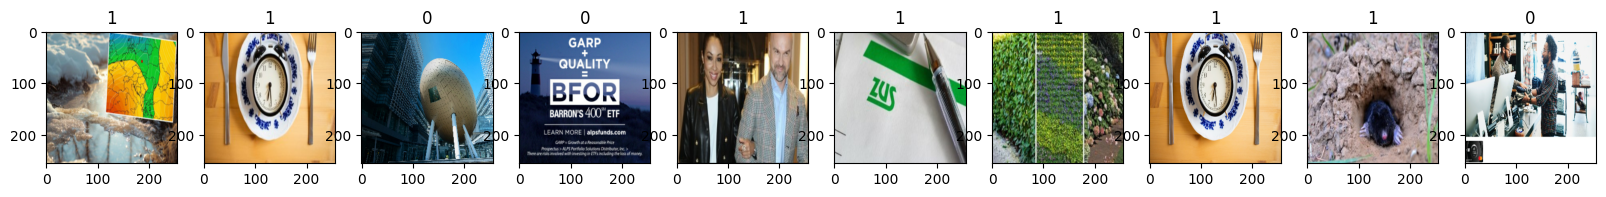

In [36]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20)) # class 1= simple image, class 0 = Ad
for idx, img in enumerate(batch[0][:10]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

From the above plot, we see how the function assigns the classes (this may change from run-to-run):

simple image = 1 <br>
Ad = 0

## Preprocess data

In [37]:
print(batch[0].max()) # our pixels are between values 0 and 255. we will scale them to be between 0 and 1

255.0


In [38]:
#batch[0] / 255

In [39]:
scaled= data.map(lambda x,y: (x/255, y)) # as we load a batch from the pipeline, we scale them on the go

In [40]:
#scaled.as_numpy_iterator().next()

In [41]:
scaled_iterator=scaled.as_numpy_iterator()

In [42]:
batch = scaled_iterator.next()

In [43]:
batch[0].max()

1.0

In [44]:
#scaled.as_numpy_iterator().next()

# Split Data

In [45]:
#len(scaled)
len(data)

44

In [46]:
train_size = int(len(scaled)*.7)# batch size 32
val_size = int(len(scaled)*.2) #
test_size = int(len(scaled)*.1) #

In [47]:
print(f'Train Size: {train_size}, Val Size:{val_size}, Test Size: {test_size}')


Train Size: 30, Val Size:8, Test Size: 4


In [48]:
train = scaled.take(train_size)
val = scaled.skip(train_size).take(val_size)
test = scaled.skip(train_size+val_size).take(test_size)

In [49]:
#train.as_numpy_iterator().next()[0]

In [50]:
#batch[0]

In [51]:
len(train)

30

# Model

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten ,Dropout, BatchNormalization
from keras import optimizers
from keras.optimizers import SGD, RMSprop, Adam


from time import perf_counter

In [53]:
SEED = 42 # to always get same dropout and shuffle

In [54]:
def allcnn(optimizer):
    model = Sequential()
    model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())
    #model.add(Dropout(0.2, seed=SEED))

    model.add(Conv2D(64, (3,3), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())
    #model.add(Dropout(0.2, seed=SEED))

    model.add(Conv2D(128, (3,3), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())
    #model.add(Dropout(0.2, seed=SEED))

    model.add(Conv2D(128, (3,3), 1, activation='relu'))
    model.add(MaxPooling2D())
    model.add(BatchNormalization())
    model.add(Dropout(0.2, seed=SEED))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    #model.add(Dropout(0.2, seed=SEED))
    model.add(Dense(1, activation='sigmoid'))

        # load the weights
    # if weights:
    #     model.load_weights(weights)

    model.compile(optimizer = optimizer, loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


    # return model
    return model

# Checking different optimisation algorithms

Vanilla SGD
SGD with momentum
SGD with Nesterov momentum
RMSProp (default and tuning some parameters)
Adam, AdaGrad, AdaDelta, AdaMax, Nadam and FTRL
We will run all of them in mini-batches of 32 samples and 30 epochs.

Note: I encourage you to change some of the optimisers' parameters below to see how the performance is affected, as well as changing the number of samples and epochs for training.


In [55]:
# I will create a list of optimisers to make the code more concise, and then run them all

# All optimisers will use the same default parameter values, to do a fair comparison:

LEARNING_RATE = 0.01
MOMENTUM = 0.9
RHO = 0.9
EPSILON = 1e-07


vanilla_sgd = optimizers.SGD(
    learning_rate=LEARNING_RATE
)
sgd_momentum = optimizers.SGD(
    learning_rate=LEARNING_RATE, momentum=MOMENTUM
)
sgd_nesterov = optimizers.SGD(
    learning_rate=LEARNING_RATE, momentum=MOMENTUM, nesterov=True
)
rmsprop = optimizers.RMSprop(
    learning_rate=LEARNING_RATE, rho=RHO, momentum=0.0, epsilon=EPSILON, centered=False
)
rmsprop_momentum = optimizers.RMSprop(
    learning_rate=LEARNING_RATE, rho=RHO, momentum=MOMENTUM, epsilon=EPSILON, centered=False
)
adam = optimizers.Adam(
    learning_rate=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=EPSILON, amsgrad=False
)
adadelta = optimizers.Adadelta(
    learning_rate=LEARNING_RATE, rho=RHO, epsilon=EPSILON
)
adagrad = optimizers.Adagrad(
    learning_rate=LEARNING_RATE, initial_accumulator_value=0.1, epsilon=EPSILON
)
adamax = optimizers.Adamax(
    learning_rate=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=EPSILON
)
nadam = optimizers.Nadam(
    learning_rate=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=EPSILON
)
ftrl = optimizers.Ftrl(
    learning_rate=0.01,
    learning_rate_power=-0.5,
    initial_accumulator_value=0.1,
    l1_regularization_strength=0.0,
    l2_regularization_strength=0.0,
    l2_shrinkage_regularization_strength=0.0,
)


In [56]:
#optimisers = [vanilla_sgd, sgd_momentum, sgd_nesterov, rmsprop, rmsprop_momentum, adam, adadelta, adagrad, adamax, nadam, ftrl]

optimisers = [sgd_momentum, rmsprop, adam]

In [57]:
# optimisers_names = [
#     'Vanilla SGD', 'SGD Momentum', 'SGD Nesterov', 'RMSprop', 'RMSprop Momentum',
#     'Adam', 'Adadelta', 'Adagrad', 'Adamax', 'Nadam', 'Ftrl'
# ]

optimisers_names = [
    'SGD Momentum', 'RMSprop', 'Adam',]

In [58]:
optimisers = {
    name: optimiser for name, optimiser in zip(optimisers_names, optimisers)
}

In [59]:
optimisers

{'SGD Momentum': <keras.src.optimizers.sgd.SGD at 0x7d7882f168f0>,
 'RMSprop': <keras.src.optimizers.rmsprop.RMSprop at 0x7d7882ff9ab0>,
 'Adam': <keras.src.optimizers.adam.Adam at 0x7d7882ffa0b0>}

In [60]:
# build model
#model = allcnn(optimiser)

In [61]:
# define hyper parameters
# learning_rateSGD = 0.01
# LEARNING_RATE = 0.001
# weight_decay = 1e-6
# momentum = 0.9
# beta1 = 0.9
# beta2 = 0.999
# epsilon=1e-07
# RHO = 0.9

In [62]:
# sgd = SGD(learning_rate=learning_rateSGD, weight_decay=weight_decay, momentum=momentum, nesterov=True)

# rmsprop = RMSprop(learning_rate=LEARNING_RATE, rho=RHO, momentum=momentum, epsilon=epsilon, centered=False)

# adam = Adam(learning_rate=LEARNING_RATE, beta_1=beta1, beta_2=beta2, epsilon=epsilon)


In [ ]:
EPOCHS=30
MINI_BATCH=32
VALIDATION_PERC=0.2
histories = {}

for optimiser_name in optimisers:
    start = perf_counter()
    print('Fitting model with optimiser: ', optimiser_name)
    model = allcnn(optimisers[optimiser_name])
    history = model.fit(train,
                        epochs=EPOCHS,
                        batch_size=MINI_BATCH,
                        validation_data=val,
                        verbose=1
                       )
    print(' - It took:', round(perf_counter()-start, 2),'seconds')
    histories[optimiser_name] = history.history

Fitting model with optimiser:  SGD Momentum
Epoch 1/30
30/30 [==============================] - 185s 6s/step - loss: 0.7760 - accuracy: 0.7125 - val_loss: 2.2878 - val_accuracy: 0.3008
Epoch 2/30
30/30 [==============================] - 189s 6s/step - loss: 0.3778 - accuracy: 0.8615 - val_loss: 0.5556 - val_accuracy: 0.6758
Epoch 3/30
30/30 [==============================] - 177s 6s/step - loss: 0.2678 - accuracy: 0.9083 - val_loss: 0.4872 - val_accuracy: 0.7969
Epoch 4/30
30/30 [==============================] - 174s 6s/step - loss: 0.1755 - accuracy: 0.9375 - val_loss: 0.5529 - val_accuracy: 0.7656
Epoch 5/30
30/30 [==============================] - 183s 6s/step - loss: 0.1357 - accuracy: 0.9563 - val_loss: 0.5400 - val_accuracy: 0.7969
Epoch 6/30
30/30 [==============================] - 175s 6s/step - loss: 0.1380 - accuracy: 0.9552 - val_loss: 0.5802 - val_accuracy: 0.8164
Epoch 7/30
30/30 [==============================] - 176s 6s/step - loss: 0.0905 - accuracy: 0.9750 - val_loss:

In [ ]:
model.summary()

In [ ]:
epochs = range(0, EPOCHS)

In [ ]:
plt.figure(figsize=(10, 7))
for h in histories:
    plt.plot(epochs, histories[h]['accuracy'], label=h)
plt.title(f'Training Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 7))
for h in histories:
    plt.plot(epochs, histories[h]['val_accuracy'], label=h)
plt.title(f'Validation Accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Train

In [ ]:
#hist = model.fit(train, epochs=30, validation_data=val)

In [ ]:
val_acc_per_epoch = hist.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'][1:], color='teal', label='loss')
plt.plot(hist.history['val_loss'][1:], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate

In [ ]:

from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    print(f'Precision: {pre.result()}, Recall:{re.result()}, Accuracy: {acc.result()}')

# Extra Testing on Unseen Data

In [ ]:
import cv2

In [ ]:
Current_dir = os.getcwd()
Current_dir

In [ ]:
#img = cv2.imread('sim.jpg')
#img= cv2.imread(os.path.join('testData','4.png')) # s (246).jpg, 9.png, 4.png, s (481).jpg
img= cv2.imread(os.path.join('unseen data','iframe_221_AD.jpg')) # futurama.jpeg, homer-simpson-wallpaper-preview.jpg , zoid.jpeg, bart-simpson-.jpg, fry.jpeg, homer-simpson-the-simpsons-.jpg, marg.jpg
#img

In [ ]:
len(img)


In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
#plt.imshow(resize.numpy().astype(int))
#plt.show()

In [ ]:
resize.shape

In [ ]:
np.expand_dims(resize,0).shape

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

simple image = 1 <br>
Ad = 0

In [ ]:
#class 1= simple img, class 0 = Ad

if yhat > 0.5:
    print(f'Predicted Simple Image')
else:
    print(f'Predicted Ad')

# Saving the model

In [ ]:
from keras.models import load_model

In [ ]:
#model.save(os.path.join('models','ad_classifier_first.h5'))
model.summary()

Check also the following article https://www.analyticsvidhya.com/blog/2020/10/create-image-classification-model-python-keras/

Keras Tuner : https://www.tensorflow.org/tutorials/keras/keras_tuner

Example model : https://www.tensorflow.org/tutorials/images/classification



# Appling a Pre-trained CNN on our Dataset for comparison

The VGG16 model

In [ ]:
#from keras.applications import VGG16

#conv_base = VGG16(weights='imagenet',
#                  include_top=False,
#                  input_shape=(256, 256, 3))

In [ ]:
#conv_base.summary()


We will add a dense layer after our conv_base NN

In [ ]:
# from keras import models
# from keras import layers

# modelPreT = models.Sequential()
# modelPreT.add(conv_base)

# modelPreT.add(layers.Flatten())
# modelPreT.add(layers.Dense(256, activation='relu'))
# modelPreT.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
#modelPreT.summary()

Before training the model, we need to separate the pretrained model from our DNN which is added on top of that. So that when we train our model we dont ruin the pretrained weights and biased of the VGG16

In [ ]:
#print('This is the number of trainable weights '
#      'before freezing the conv base:', len(modelPreT.trainable_weights))

In [ ]:
#conv_base.trainable = False

In [ ]:
#print('This is the number of trainable weights '
 #     'after freezing the conv base:', len(modelPreT.trainable_weights))

In [ ]:
#modelPreT.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
#train.as_numpy_iterator().next()[0]

In [ ]:
#histPreT = modelPreT.fit(train, epochs=4, validation_data=val) #  epochs 10 are over fitting. early stop at?

In [ ]:
# acc = histPreT.history['accuracy']
# val_acc = histPreT.history['val_accuracy']
# loss = histPreT.history['loss']
# val_loss = histPreT.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()

In [ ]:
# pre = Precision()
# re = Recall()
# acc = BinaryAccuracy()

In [ ]:
# for batch in test.as_numpy_iterator():
#     X, y = batch
#     yhatPreT = modelPreT.predict(X)
#     pre.update_state(y, yhatPreT)
#     re.update_state(y, yhatPreT)
#     acc.update_state(y, yhatPreT)
#     print(f'Precision: {pre.result()}, Recall:{re.result()}, Accuracy: {acc.result()}')

In [ ]:
#imgPre= cv2.imread(os.path.join('testData','Unseen','futurama1.jpg')) # marg.jpg, homer-simpson-the-simpsons-.jpg, 4.png, s (481).jpg , images.jpg, bender.jpeg, fry.jpeg
#imgPre= cv2.imread(os.path.join('testData','s (481).jpg')) # marg.jpg, homer-simpson-the-simpsons-.jpg, 4.png, s (481).jpg , images.jpg, bender.jpeg, fry.jpeg

In [ ]:
#plt.imshow(cv2.cvtColor(imgPre, cv2.COLOR_BGR2RGB))
#plt.show()

In [ ]:
#resizePreT = tf.image.resize(imgPre, (256,256))
#resize

In [ ]:
#plt.imshow(resizePreT.numpy().astype(int))
#plt.show()

In [ ]:
#np.expand_dims(resizePreT,0).shape

In [ ]:
#yhat_newPreT = modelPreT.predict(np.expand_dims(resizePreT/255, 0))#/255 scale
#yhat_newPreT

For the pretrained model the classes were inverted, so we have:

Simpsons = 0 <br>
Futurama = 1

In [ ]:
#class 0= futurama, class 1 = simpsons

# if yhat_newPreT < 0.5:
#     print(f'Predicted class is simpsons')
# else:
#     print(f'Predicted class is futurama')

In [ ]:
#modelPreT.save(os.path.join('models','Pretrained_futurama_and_simpsons.h5'))
#modelPreT.summary()  # As a reminder.